# scTOP Vignette 2- Constructing Reference Bases

In [2]:
# Load libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import plotly.io as pio
pio.renderers.default = 'notebook'
import sys
sys.path.append('/restricted/projectnb/crem-trainees/Kotton_Lab/Eitan/Vilker_Helper_Files/scTOP')
%load_ext autoreload
%autoreload 1
%aimport SimilarityHelper
%aimport TopObject

## Load new dataset and set as basis

In [3]:
# We don't need to process the data if using it just as a basis
habermann = TopObject.TopObject("Habermann", skipProcess=True)
habermann.setBasis()

Setting AnnData object...
Setting metadata...
Setting DataFrame...
Finished setup!
Setting basis...


100%|██████████| 11/11 [00:07<00:00,  1.39it/s]


Basis set!


celltype,Ciliated,AT2,SCGB3A2+,MUC5B+,Basal,SCGB3A2+ SCGB1A1+,Differentiating Ciliated,Transitional AT2,AT1,KRT5-/KRT17+,Proliferating Epithelial Cells
gene,,,,,,,,,,,
RP11-34P13.3,-0.831330,-0.762994,-0.812972,-0.766483,-0.819252,-0.747608,-0.842894,-0.768180,0.004426,-0.747805,-0.747411
FAM138A,-0.831330,-0.762994,-0.812972,-0.766483,-0.819252,-0.747608,-0.842894,-0.768180,-0.679940,-0.747805,-0.747411
OR4F5,-0.831330,-0.762994,-0.812972,-0.766483,-0.819252,-0.747608,-0.842894,-0.768180,-0.679940,-0.747805,-0.747411
RP11-34P13.7,-0.153250,-0.762994,-0.812972,-0.766483,-0.146178,-0.048448,-0.842894,-0.768180,-0.679940,-0.073938,-0.747411
RP11-34P13.8,-0.831330,-0.762994,-0.812972,-0.766483,-0.819252,-0.747608,-0.842894,-0.768180,-0.679940,-0.747805,-0.747411
...,...,...,...,...,...,...,...,...,...,...,...
AC233755.2,-0.153250,-0.762994,-0.812972,-0.766483,-0.819252,-0.747608,-0.842894,-0.768180,0.045767,-0.747805,-0.747411
AC233755.1,0.034152,-0.762994,0.103739,-0.766483,0.076810,-0.747608,-0.174210,-0.768180,-0.679940,0.086850,0.257767
AC240274.1,0.453834,0.366976,0.374307,0.350593,0.439696,0.438549,0.489463,0.339263,0.356215,0.438017,0.397548


## Test basis columns

In [4]:
# This test may take some time, but you should end up with an overall acuracy and be able to determine which annotations had performance problems. 
# A good basis should have top1 accuracy > 80%
habermann.testBasis()

Setting basis...


100%|██████████| 11/11 [00:06<00:00,  1.63it/s]


Basis set!
Processing test data...


100%|██████████| 10/10 [00:37<00:00,  3.71s/it]

top1: 0.7964777542372882
top3: 0.9061175847457628
Unspecified: 0.08620233050847458


{'top1': 6015, 'top3': 6843, 'Unspecified': 651, 'Total test count': 7552}

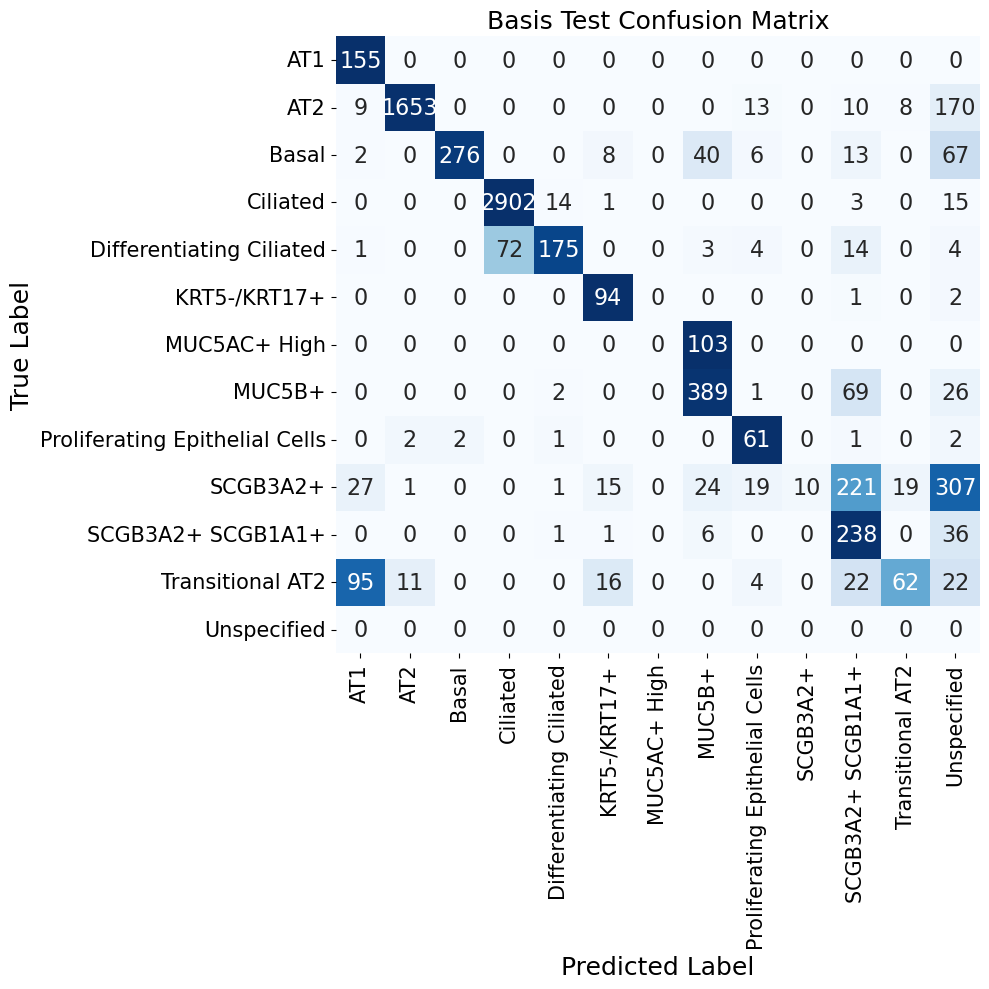

In [10]:
# You can also create a confusion matrix to see the distribution of what the test cells were predicted as
SimilarityHelper.plotBasisTestConfusionMatrix(habermann, figX=10, figY=10)

## Load another dataset to test against this new basis

In [11]:
kathiriya = TopObject.TopObject("Kathiriya") # Load object
kathiriya.projectOntoBasis(habermann.basis, "Habermann") # Construct projections

Setting AnnData object...
Setting metadata...
Setting DataFrame...
Processing scTOP data...
Finished setup!
Projecting onto basis...
Finished projecting! 22164 genes were in both the source and basis.


,AAACCTGAGCACCGTC_d0_2,AAACCTGCACATGGGA_d0_2,AAACCTGTCATCATTC_d0_2,AAACCTGTCCAAGCCG_d0_2,AAACGGGAGCTGCCCA_d0_2,AAACGGGGTACCAGTT_d0_2,AAACGGGGTTGTTTGG_d0_2,AAACGGGTCTGTCTAT_d0_2,AAAGATGAGCTGGAAC_d0_2,AAAGATGAGTAGCCGA_d0_2,...,TTTGTTGCACACCAGC_d21,TTTGTTGCACTCAGAT_d21,TTTGTTGCATACAGAA_d21,TTTGTTGCATCTAACG_d21,TTTGTTGGTCGAAACG_d21,TTTGTTGGTTCCTAAG_d21,TTTGTTGGTTCTTAGG_d21,TTTGTTGTCCATCTAT_d21,TTTGTTGTCGAACCAT_d21,TTTGTTGTCTGTAAGC_d21
celltype,,,,,,,,,,,,,,,,,,,,,
Ciliated,-0.113665,-0.066574,-0.065311,-0.096251,-0.082707,-0.075273,-0.059251,-0.086875,-0.115482,-0.108198,...,-0.051404,-0.104694,-0.095827,-0.100411,0.011364,-0.057016,-0.067508,-0.032071,-0.078692,-0.064472
AT2,0.176181,0.208955,0.138431,0.131623,0.164158,0.190470,0.091153,0.187522,0.250963,0.220240,...,-0.043254,-0.096230,-0.056296,0.068937,-0.072836,-0.034602,-0.043964,-0.021679,-0.046149,-0.022696
SCGB3A2+,0.035444,-0.015446,-0.001284,-0.020002,-0.011519,-0.025490,0.004935,0.020527,-0.015702,-0.040433,...,-0.130350,-0.161370,-0.181461,-0.028452,-0.150683,-0.117925,-0.137131,-0.074184,-0.133693,-0.093840
MUC5B+,-0.078240,-0.027439,-0.044696,-0.036803,-0.043684,-0.036823,-0.026843,-0.050477,-0.073361,-0.049549,...,0.039404,0.069927,0.103594,0.005759,0.090660,0.152081,0.213520,0.081200,0.048407,0.152162
Basal,-0.042635,0.004292,-0.009511,-0.007217,-0.000432,0.003556,0.000821,-0.024239,-0.002824,0.006803,...,0.200250,0.203388,0.224288,0.038679,-0.008036,0.125753,0.152803,0.060569,0.247514,0.107395
SCGB3A2+ SCGB1A1+,0.093655,0.040990,0.050829,0.042059,0.057928,0.061539,0.029926,0.018770,0.114676,0.069841,...,0.046523,0.029998,0.092993,0.047782,0.048617,0.039519,0.090446,0.022118,0.027210,0.043554
Differentiating Ciliated,0.073826,0.039188,0.045456,0.059855,0.059275,0.047518,0.042203,0.045286,0.054447,0.061720,...,0.014687,0.057787,0.021914,0.070509,0.239976,0.034352,0.018889,0.036668,0.024589,0.041632
Transitional AT2,0.034098,0.033392,0.027469,0.108602,0.039843,0.046378,0.058556,-0.026021,0.050014,0.033719,...,-0.006367,-0.014321,-0.001787,0.019929,0.016420,0.003330,0.011630,0.019929,0.015205,-0.004781
AT1,0.040523,-0.014508,0.024175,0.076130,0.005480,0.026621,0.046066,0.035411,0.073320,0.031503,...,-0.001666,-0.012486,0.002797,-0.015536,-0.017102,0.006672,0.001549,-0.014330,0.006269,-0.021591


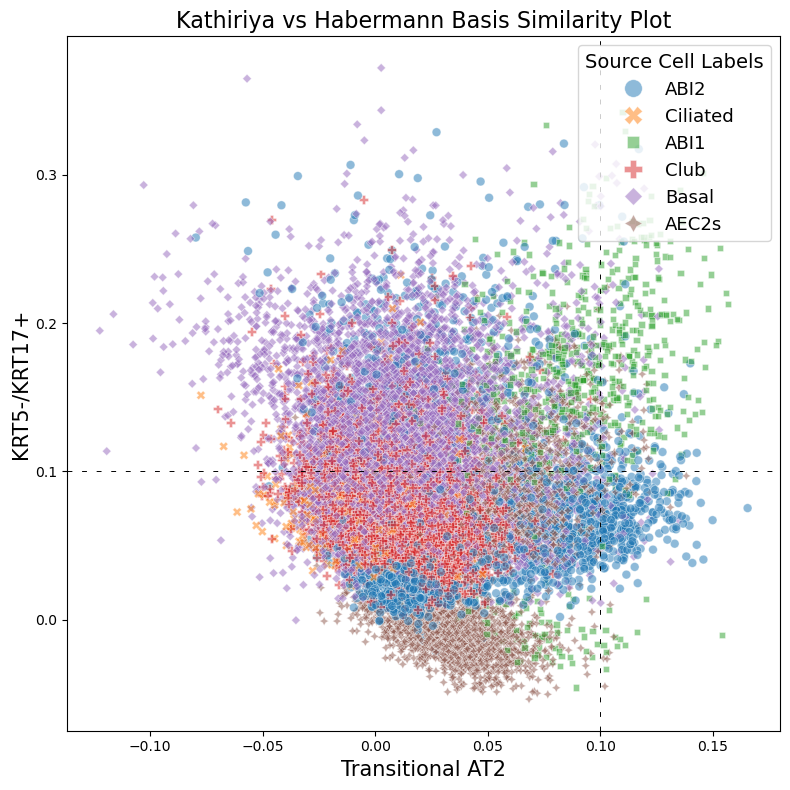

In [13]:
# Now plot exactly as before
axis1 = "Transitional AT2"
axis2 = "KRT5-/KRT17+"
SimilarityHelper.plotTwo(kathiriya.projections["Habermann"], kathiriya.annotations, axis1, axis2,
         title="Kathiriya vs Habermann Basis Similarity Plot"
)

## Combine two bases

In [14]:
# LungMAP will be our primary dataset, and so we'll want to select specific labels from Kathiriya to add to it
# Like how we used a summary file to keep track of datasets, we can use one to keep track of bases
basisCollection = "/restricted/projectnb/crem-trainees/Kotton_Lab/Eitan/OutsidePaperObjects/Bases/BasisCollection.csv"
humanBasis = SimilarityHelper.loadBasis(basisCollection=basisCollection, basisName="LungMAP")

# Combine Habermann's two selected cell types with all of LungMAP's
habermann.combineBases(humanBasis, firstKeep=["Transitional AT2", "KRT5-/KRT17+"], name="LungMAP")

# Project source onto the combined basis
kathiriya.projectOntoBasis(habermann.combinedBases["LungMAP"], "LungMAP + Habermann")

Loaded basis!
Combining bases...
Projecting onto basis...
Finished projecting! 21747 genes were in both the source and basis.


,AAACCTGAGCACCGTC_d0_2,AAACCTGCACATGGGA_d0_2,AAACCTGTCATCATTC_d0_2,AAACCTGTCCAAGCCG_d0_2,AAACGGGAGCTGCCCA_d0_2,AAACGGGGTACCAGTT_d0_2,AAACGGGGTTGTTTGG_d0_2,AAACGGGTCTGTCTAT_d0_2,AAAGATGAGCTGGAAC_d0_2,AAAGATGAGTAGCCGA_d0_2,...,TTTGTTGCACACCAGC_d21,TTTGTTGCACTCAGAT_d21,TTTGTTGCATACAGAA_d21,TTTGTTGCATCTAACG_d21,TTTGTTGGTCGAAACG_d21,TTTGTTGGTTCCTAAG_d21,TTTGTTGGTTCTTAGG_d21,TTTGTTGTCCATCTAT_d21,TTTGTTGTCGAACCAT_d21,TTTGTTGTCTGTAAGC_d21
Transitional AT2,0.071503,0.064885,0.053589,0.128211,0.066315,0.075602,0.076522,0.037101,0.101850,0.077699,...,-0.040198,-0.036519,-0.060379,0.020425,-0.021493,-0.033890,-0.046232,-0.005426,-0.022720,-0.029912
KRT5-/KRT17+,0.023104,-0.003633,-0.005128,-0.008458,-0.006665,-0.019164,-0.012849,0.043994,0.008317,0.016960,...,0.074957,0.094111,0.083987,0.049093,0.075581,0.043169,0.053835,0.011089,0.075484,0.047682
Alveolar macrophage,-0.081262,-0.041723,-0.032402,-0.035090,-0.032813,-0.026409,-0.034336,-0.066197,-0.075381,-0.016927,...,0.002470,0.030557,0.041948,-0.017708,0.013223,-0.004221,0.028996,0.006705,0.019835,-0.001429
Alveolar type 2,0.180780,0.190005,0.139812,0.142840,0.162474,0.192297,0.110347,0.148974,0.237791,0.219921,...,0.020592,0.016744,0.047551,0.090291,0.005340,0.025488,0.029885,0.010863,0.023942,0.014078
Suprabasal,-0.000717,0.017413,0.017288,0.022297,0.007727,0.011286,0.013934,-0.013971,0.010506,0.002168,...,0.153414,0.252008,0.233568,0.028566,0.069243,0.148564,0.181729,0.059189,0.147994,0.098884
Inflammatory monocyte,0.057286,0.035245,0.028782,0.047960,0.031063,0.039236,0.028967,0.045239,0.081668,0.045232,...,0.039987,0.058002,0.057948,0.055422,0.061932,0.059564,0.055729,0.035060,0.052934,0.049675
Capillary 1,0.012639,-0.001487,0.008272,-0.008341,-0.002789,0.000854,0.003378,0.005552,0.000232,0.007482,...,-0.002624,-0.009911,-0.012572,-0.010261,-0.018852,-0.006555,-0.006857,0.000150,-0.009328,-0.003276
Ciliated,-0.038775,-0.023507,-0.018439,-0.037533,-0.019500,-0.026638,-0.014316,-0.036821,-0.056901,-0.040531,...,-0.023212,-0.040668,-0.060121,-0.033837,0.170867,-0.020723,-0.040647,0.002519,-0.043454,-0.016793
Basal,0.007591,0.003144,-0.015005,0.014289,0.012298,0.000115,0.008086,0.013198,0.024856,0.019750,...,0.105078,0.079923,0.089852,0.029807,-0.025781,0.022105,0.027882,0.002894,0.134377,0.026070
Alveolar type 1,0.003015,-0.047759,-0.007020,0.030687,-0.031276,-0.030652,0.008821,0.016372,-0.004416,-0.030404,...,-0.046068,-0.056132,-0.056314,-0.042590,-0.062957,-0.034408,-0.048657,-0.037488,-0.050438,-0.044281


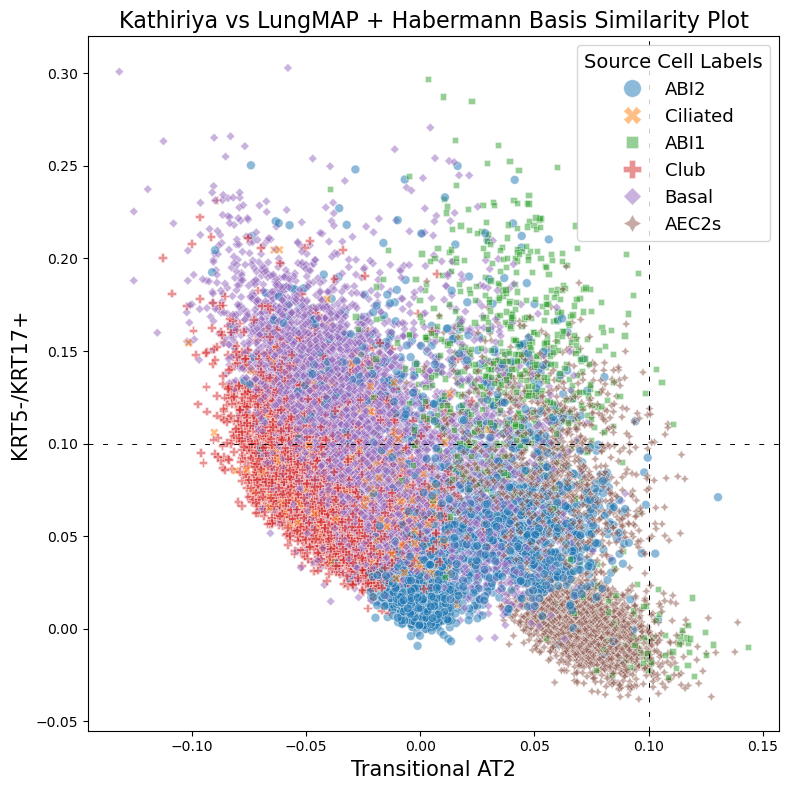

In [15]:
# Now plot against the same axes, but with the hopefully more informed background information provided by LungMAP (axes can be in any combination from the bases)
axis1 = "Transitional AT2"
axis2 = "KRT5-/KRT17+"
SimilarityHelper.plotTwo(kathiriya.projections["LungMAP + Habermann"], kathiriya.annotations, axis1, axis2,
         title="Kathiriya vs LungMAP + Habermann Basis Similarity Plot"
)